In [41]:
import numpy as np

In [48]:
import pandas as pd
data=pd.read_csv("data/StudentsPerformance.csv")



In [49]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
data["average_score"]=round((data["math score"]+data["reading score"]+data["writing score"])/3,3)

<Axes: xlabel='average_score', ylabel='Count'>

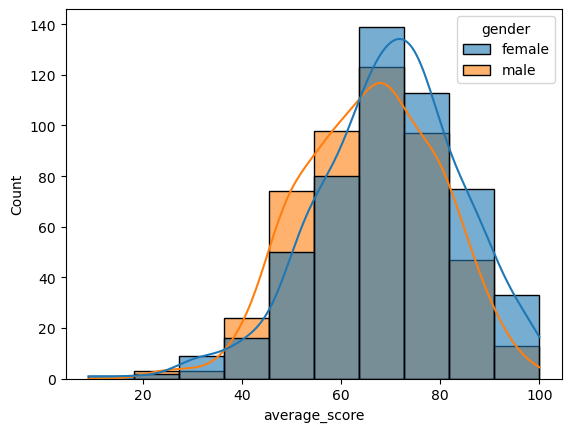

In [21]:
sns.histplot(data,x="average_score",hue="gender",kde=True,bins=10,alpha=.6)

In [51]:
data_encoded = pd.get_dummies(data, columns=["gender"], drop_first=True)

In [52]:
gender_columns = [col for col in data_encoded.columns if "gender_" in col]  # Identify dummy gender columns
data_encoded[gender_columns] = data_encoded[gender_columns].astype(int)

In [46]:
data_encoded = pd.get_dummies(data, columns=["gender"], drop_first=True)
data_encoded.loc[:, data_encoded.select_dtypes(include=['number']).columns] = data_encoded.select_dtypes(include=['number']).astype(int)


In [53]:
data_encoded.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,gender_male
0,group B,bachelor's degree,standard,none,72,72,74,72.667,0
1,group C,some college,standard,completed,69,90,88,82.333,0
2,group B,master's degree,standard,none,90,95,93,92.667,0
3,group A,associate's degree,free/reduced,none,47,57,44,49.333,1
4,group C,some college,standard,none,76,78,75,76.333,1


In [55]:
corelation=data_encoded["gender_male"].corr(data["average_score"])
corelation

-0.1308618745124614

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
data_encoded2=OneHotEncoder(drop="first",sparse_output=False)

In [75]:
import pandas as pd
data=pd.read_csv("data/StudentsPerformance.csv")

In [76]:
data_encod=data_encoded2.fit_transform(data[["parental level of education","race/ethnicity","lunch","test preparation course"]])
        
                                       

In [77]:
encoded=pd.DataFrame(data_encod,columns=data_encoded2.get_feature_names_out(["parental level of education","race/ethnicity","lunch","test preparation course"]))

In [78]:
encoded.head()

,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [79]:
encoded.to_csv("encoded.csv",index=False)

In [7]:
data.shape

(1000, 8)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<Axes: xlabel='test preparation course', ylabel='writing score'>

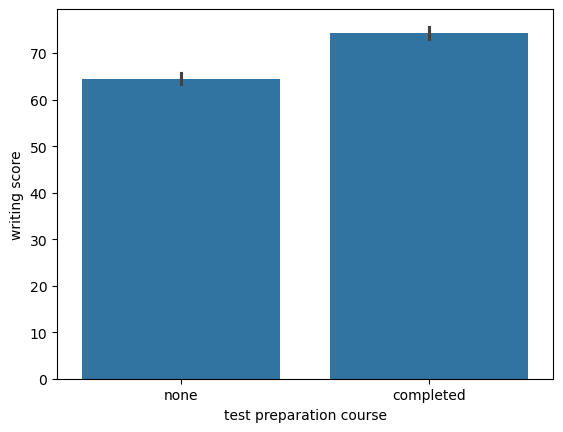

In [16]:
sns.barplot(x=data["test preparation course"],y=data["writing score"])